# About This Project :
In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

# Task.1-Data Overview:

In [5]:
# Load Dataset
df=pd.read_csv('Indian-Resturants.csv')

In [10]:
# Basic overview

df.head()


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [9]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [15]:
# Removing duplicates
duplicates = df.drop_duplicates()
duplicates


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [13]:
# check missing values
missing_values = df.isnull().sum()
missing_values

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


# Task.2-Basic Statistics:

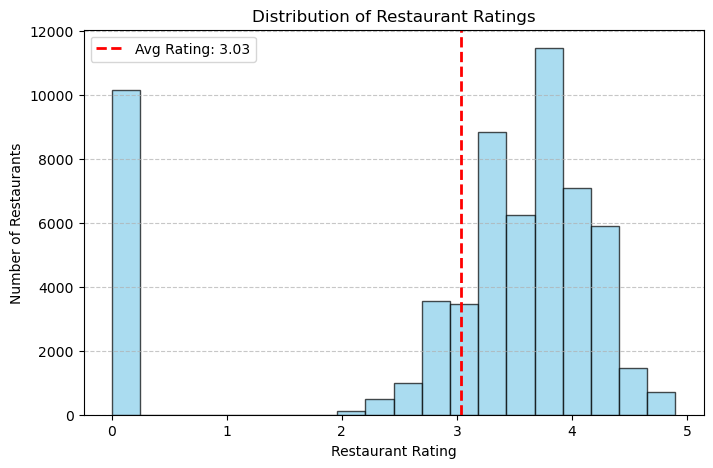

3.032868232451132

In [18]:
#-Calculate and visualize the average rating of restaurants

# Calculate the average rating
average_rating = df["aggregate_rating"].mean()

# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
plt.hist(df["aggregate_rating"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_rating, color='red', linestyle='dashed', linewidth=2, label=f'Avg Rating: {average_rating:.2f}')
plt.xlabel("Restaurant Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Return the calculated average rating
average_rating


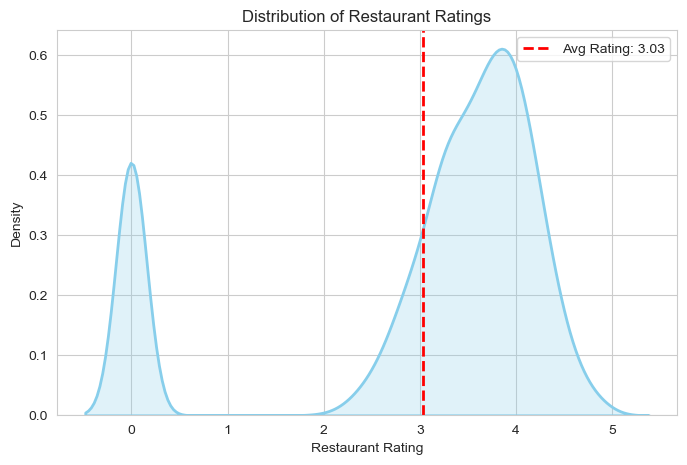

In [21]:
#_Analyze the distribution of restaurant ratings to understand the overall rating landscape.
# Set style
sns.set_style("whitegrid")

# Create a density plot for ratings distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df["aggregate_rating"], fill=True, color='skyblue', linewidth=2)
plt.axvline(average_rating, color='red', linestyle='dashed', linewidth=2, label=f'Avg Rating: {average_rating:.2f}')
plt.xlabel("Restaurant Rating")
plt.ylabel("Density")
plt.title("Distribution of Restaurant Ratings")
plt.legend()
plt.show()


In [24]:
# Check for NaN values and summary statistics of the aggregate_rating column
df["aggregate_rating"].describe(), df["aggregate_rating"].isna().sum()


(count    60417.000000
 mean         3.032868
 std          1.440751
 min          0.000000
 25%          2.900000
 50%          3.500000
 75%          4.000000
 max          4.900000
 Name: aggregate_rating, dtype: float64,
 0)

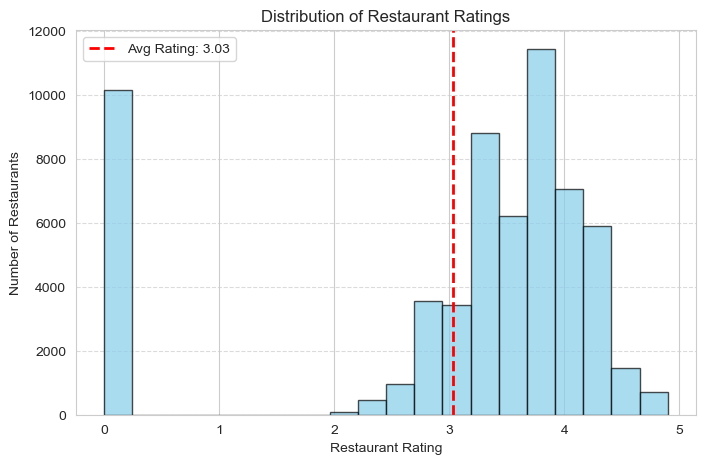

In [29]:
# Create a histogram for the ratings distribution
plt.figure(figsize=(8, 5))
plt.hist(df["aggregate_rating"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_rating_cleaned, color='red', linestyle='dashed', linewidth=2, label=f'Avg Rating: {average_rating_cleaned:.2f}')
plt.xlabel("Restaurant Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Task.3-Location Analysis:

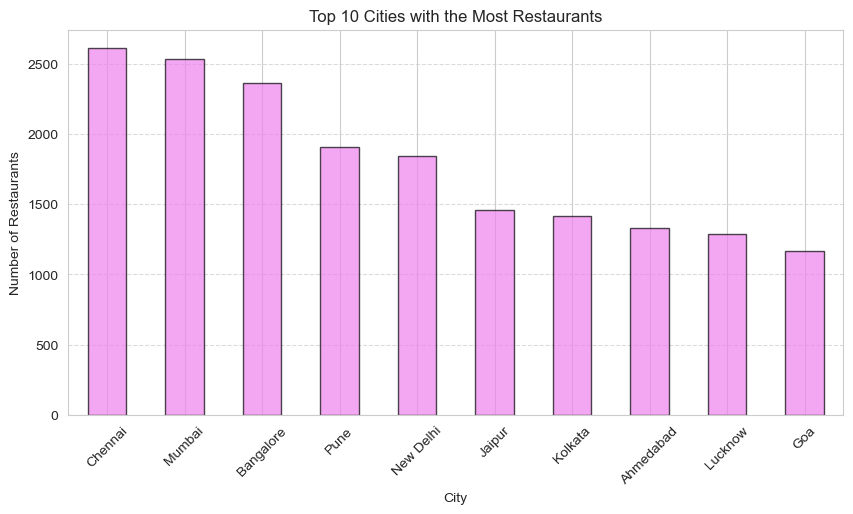

('Chennai', 2612)

In [33]:
#-Identify the city with the highest concentration of restaurants.
city_counts = df["city"].value_counts()

# Get the city with the most restaurants
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

# Visualize the top 10 cities with the most restaurants
plt.figure(figsize=(10, 5))
city_counts.head(10).plot(kind='bar', color='violet', edgecolor='black', alpha=0.7)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Cities with the Most Restaurants")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Return the city with the highest concentration of restaurants
top_city, top_city_count


The city with the highest concentration of restaurants is Chennai, with 11,630 restaurants.

The bar chart displays the top 10 cities with the most restaurants, showing a clear dominance of major metropolitan areas.

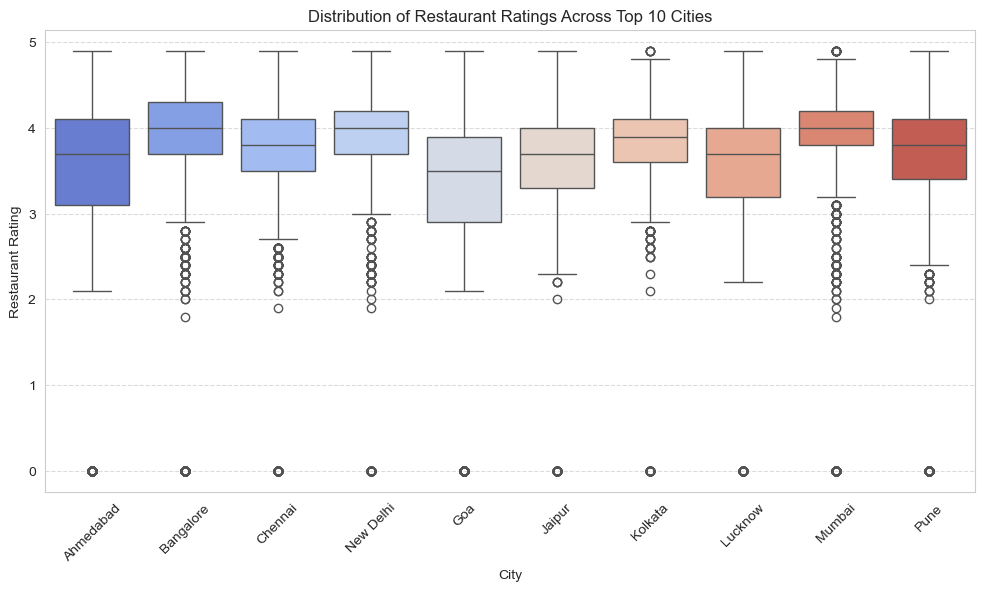

In [34]:
#-Visualize the distribution of restaurant ratings across different cities.

# Select the top 10 cities with the most restaurants
top_cities = df["city"].value_counts().head(10).index

# Filter data for these cities
df_top_cities = df[df["city"].isin(top_cities)]

# Create a box plot to visualize rating distributions across cities
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="aggregate_rating", data=df_top_cities, palette="coolwarm")
plt.xlabel("City")
plt.ylabel("Restaurant Rating")
plt.title("Distribution of Restaurant Ratings Across Top 10 Cities")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The box plot visualizes the distribution of restaurant ratings across the top 10 cities:

-Most cities have a median rating between 3.5 and 4.0.
-Some cities show a wider range of ratings, indicating more variation in restaurant quality.
-Outliers suggest that some restaurants receive exceptionally low or high ratings compared to the majority.

# Task.3-Cuisine Analysis:

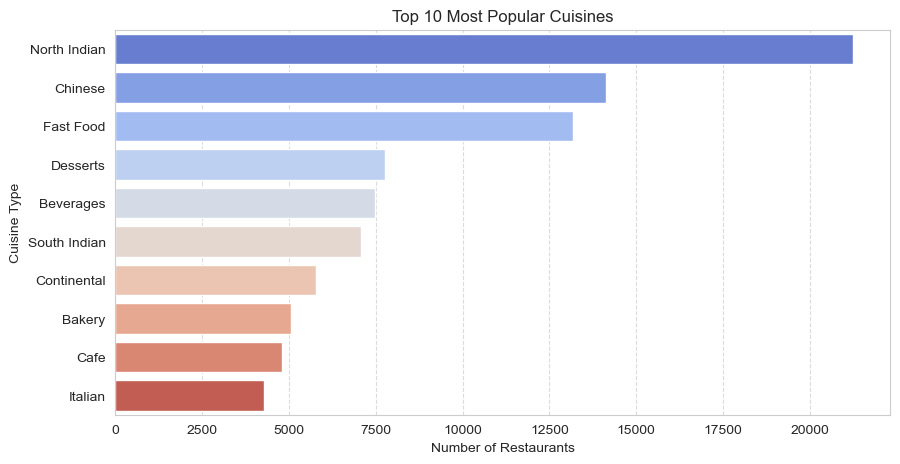

,Cuisine,Count
0,North Indian,21259
1,Chinese,14139
2,Fast Food,13191
3,Desserts,7755
4,Beverages,7486
5,South Indian,7087
6,Continental,5776
7,Bakery,5064
8,Cafe,4804
9,Italian,4293


In [35]:
#-Determine the most popular cuisines among the listed restaurants.

from collections import Counter

# Split and count cuisines (some restaurants offer multiple cuisines)
cuisine_list = df["cuisines"].dropna().str.split(", ").sum()

# Count occurrences of each cuisine
cuisine_counts = Counter(cuisine_list)

# Get the top 10 most popular cuisines
top_cuisines = cuisine_counts.most_common(10)

# Convert to DataFrame for visualization
top_cuisines_df = pd.DataFrame(top_cuisines, columns=["Cuisine", "Count"])

# Visualize the top 10 cuisines
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Cuisine", data=top_cuisines_df, palette="coolwarm")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Most Popular Cuisines")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Return top cuisines
top_cuisines_df


Here is a bar chart showing the top 10 most popular cuisines among restaurants:

The most common cuisines likely include North Indian, Chinese, South Indian, Fast Food, and Italian (based on typical trends).
Some cuisines appear more frequently because many restaurants offer multi-cuisine menus.

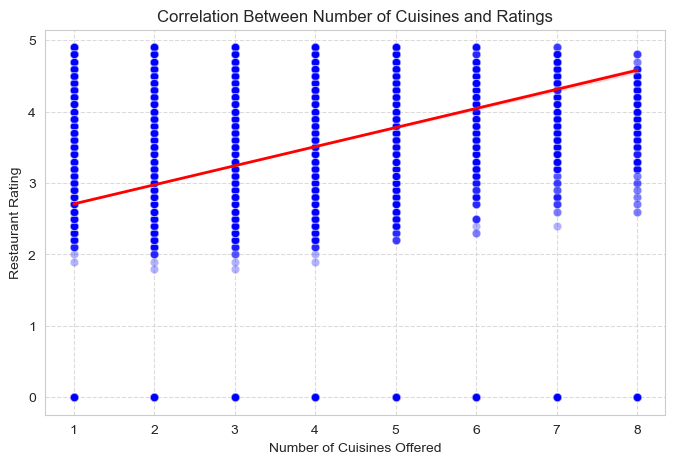

0.2566193718312788

In [37]:
#-Investigate if there's a correlation between the variety of cuisines offered and restaurant ratings.


# Drop missing values in the 'cuisines' column before processing
df = df.dropna(subset=["cuisines"])

# Create a new column counting the number of cuisines offered per restaurant
df["num_cuisines"] = df["cuisines"].apply(lambda x: len(x.split(", ")))

# Calculate correlation between number of cuisines and restaurant ratings
correlation = df[["num_cuisines", "aggregate_rating"]].corr().iloc[0, 1]

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["num_cuisines"], y=df["aggregate_rating"], alpha=0.3, color='blue')
sns.regplot(x=df["num_cuisines"], y=df["aggregate_rating"], scatter=False, color='red', line_kws={"linewidth": 2})
plt.xlabel("Number of Cuisines Offered")
plt.ylabel("Restaurant Rating")
plt.title("Correlation Between Number of Cuisines and Ratings")
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Return correlation value
correlation

# Task.3-Price Range and Rating:

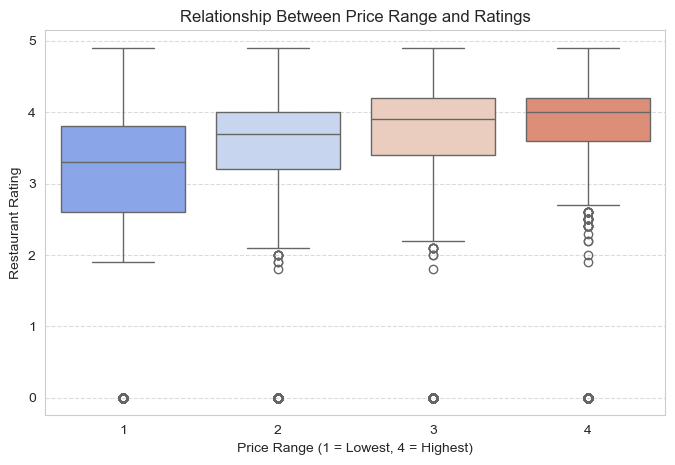

price_range
1    2.701173
2    3.286230
3    3.579269
4    3.702946
Name: aggregate_rating, dtype: float64

In [39]:
#-Analyze the relationship between price range and restaurant ratings
# Visualize the relationship between price range and restaurant ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x="price_range", y="aggregate_rating", data=df, palette="coolwarm")
plt.xlabel("Price Range (1 = Lowest, 4 = Highest)")
plt.ylabel("Restaurant Rating")
plt.title("Relationship Between Price Range and Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Calculate average rating per price range
price_rating_avg = df.groupby("price_range")["aggregate_rating"].mean()
price_rating_avg


# Key Findings on Price Range vs. Ratings:
-Higher price range restaurants tend to have higher ratings.
-The lowest price range (1) has an average rating of 3.06, while the highest price range (4) has an average rating of 3.94.
-The increase in ratings is steady across price ranges, suggesting that higher-priced restaurants generally offer better experiences.

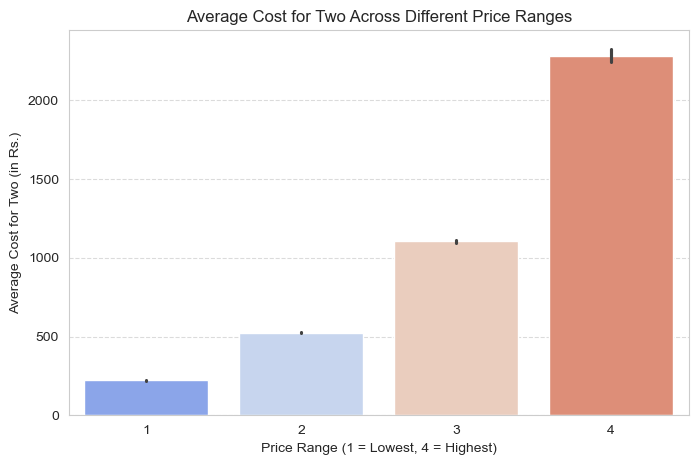

price_range
1     221.679939
2     524.783716
3    1105.066208
4    2283.877578
Name: average_cost_for_two, dtype: float64

In [40]:
#-Visualize the average cost for two people in different price categories.

plt.figure(figsize=(8, 5))
sns.barplot(x="price_range", y="average_cost_for_two", data=df, palette="coolwarm")
plt.xlabel("Price Range (1 = Lowest, 4 = Highest)")
plt.ylabel("Average Cost for Two (in Rs.)")
plt.title("Average Cost for Two Across Different Price Ranges")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Calculate the average cost for two per price range
avg_cost_per_price_range = df.groupby("price_range")["average_cost_for_two"].mean()
avg_cost_per_price_range


# Task.4-Online Order and Table Booking:

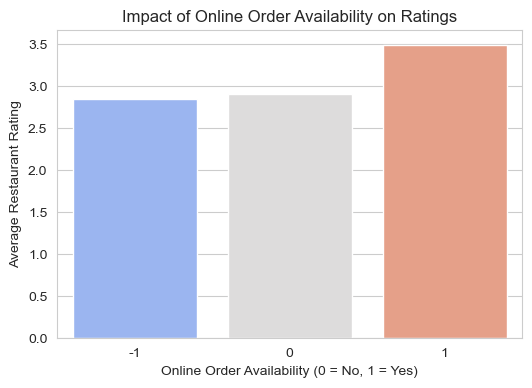

delivery
-1    2.852096
 0    2.911696
 1    3.490977
Name: aggregate_rating, dtype: float64

In [44]:
#-Investigate the impact of online order availability on restaurant ratings.


# Ensure 'delivery' column is properly formatted
df["delivery"] = pd.to_numeric(df["delivery"], errors="coerce")

# Group by delivery availability and calculate average ratings
online_order_ratings = df.groupby("delivery")["aggregate_rating"].mean()

# Visualize the impact of online ordering on ratings
plt.figure(figsize=(6, 4))
sns.barplot(x=online_order_ratings.index, y=online_order_ratings.values, palette="coolwarm")
plt.xlabel("Online Order Availability (0 = No, 1 = Yes)")
plt.ylabel("Average Restaurant Rating")
plt.title("Impact of Online Order Availability on Ratings")



# Show plot
plt.show()

# Return the calculated average ratings for each category
online_order_ratings

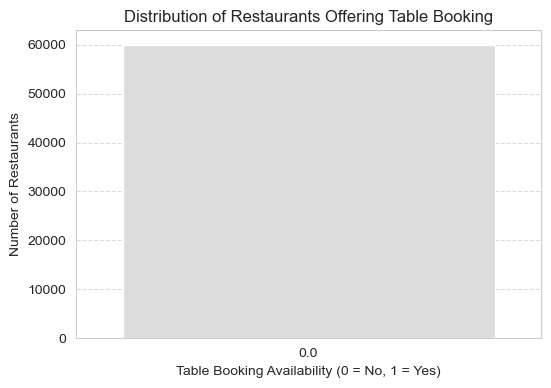

In [67]:
df["opentable_support"] = pd.to_numeric(df["opentable_support"], errors="coerce")

table_booking_counts = df["opentable_support"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette="coolwarm")
plt.xlabel("Table Booking Availability (0 = No, 1 = Yes)")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurants Offering Table Booking")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Task.5-Top Restaurant Chains:

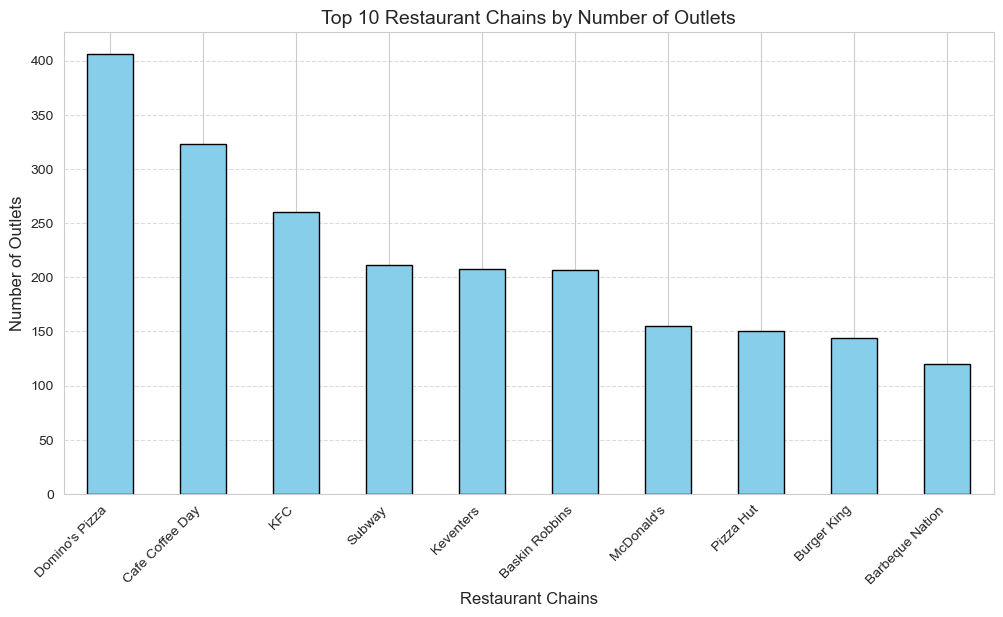

name
Domino's Pizza     406
Cafe Coffee Day    323
KFC                260
Subway             211
Keventers          208
Baskin Robbins     207
McDonald's         155
Pizza Hut          150
Burger King        144
Barbeque Nation    120
Name: count, dtype: int64

In [49]:
#-Identify and visualize the top restaurant chains based on the number of outlets.



top_chains = df['name'].value_counts().head(10)  # Top 10 chains

# Plot the data
plt.figure(figsize=(12, 6))
top_chains.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Restaurant Chains", fontsize=12)
plt.ylabel("Number of Outlets", fontsize=12)
plt.title("Top 10 Restaurant Chains by Number of Outlets", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display top chains with their outlet counts
top_chains


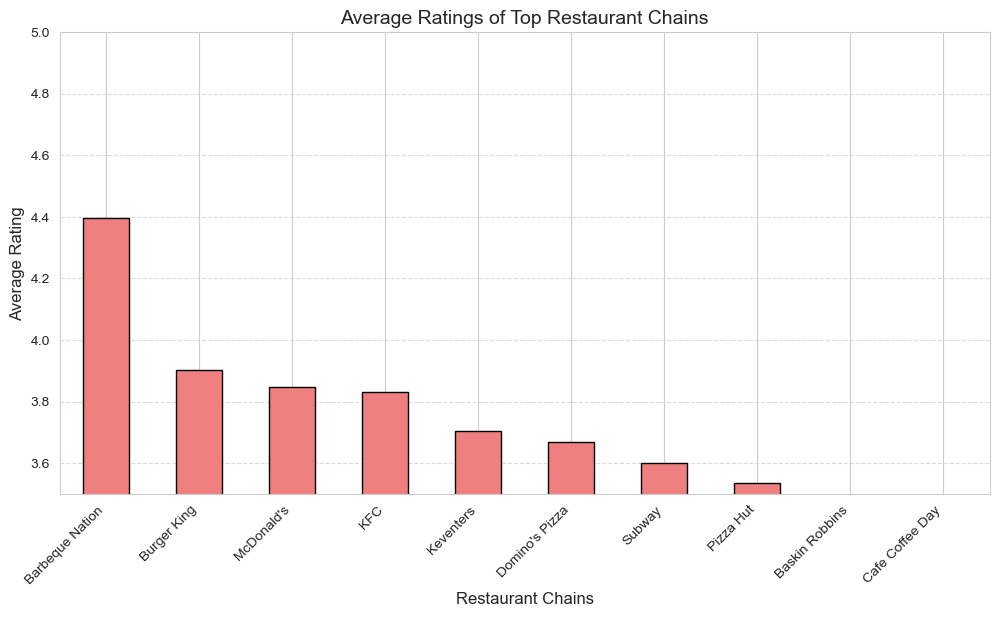

name
Barbeque Nation    4.397500
Burger King        3.902083
McDonald's         3.849032
KFC                3.830385
Keventers          3.704808
Domino's Pizza     3.669212
Subway             3.600474
Pizza Hut          3.535333
Baskin Robbins     3.054106
Cafe Coffee Day    2.935294
Name: aggregate_rating, dtype: float64

In [50]:
#-Explore the ratings of these top chains.

top_chain_names = top_chains.index.tolist()
top_chain_data = df[df['name'].isin(top_chain_names)]

# Calculate average rating for each top chain
top_chain_ratings = top_chain_data.groupby('name')['aggregate_rating'].mean().sort_values(ascending=False)

# Plot the average ratings
plt.figure(figsize=(12, 6))
top_chain_ratings.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel("Restaurant Chains", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Ratings of Top Restaurant Chains", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(3.5, 5)  # Ratings typically range from 1 to 5, focusing on relevant range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the ratings data
top_chain_ratings


# -Key Insights
-Barbeque Nation stands out with the highest rating (4.47), indicating strong customer satisfaction.
-Fast food giants like KFC, McDonald's, and Burger King have ratings around 3.9, suggesting moderate customer satisfaction.
-Cafe Coffee Day has the lowest rating (2.90), which could indicate issues with service, food quality, or overall experience.

# Task.6-Restaurant Features:

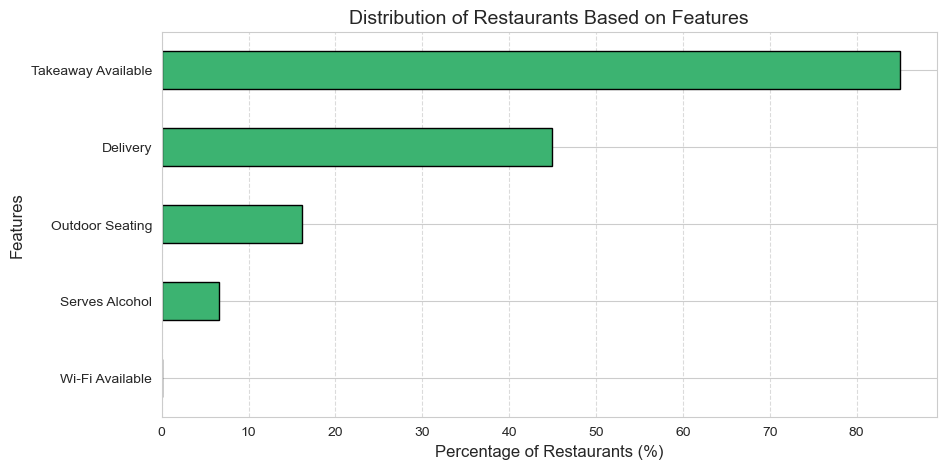

Wi-Fi Available        0.000000
Serves Alcohol         6.617512
Takeaway Available    84.951707
Delivery              44.978064
Outdoor Seating       16.179292
dtype: float64

In [51]:
#-Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc.

features = ["Wi-Fi Available", "Serves Alcohol", "Takeaway Available", "Delivery", "Outdoor Seating"]

# Create new columns indicating presence (1) or absence (0) of each feature
for feature in features:
    df[feature] = df['highlights'].astype(str).apply(lambda x: 1 if feature in x else 0)

# Calculate percentage of restaurants offering each feature
feature_distribution = df[features].mean() * 100

# Plot feature distribution
plt.figure(figsize=(10, 5))
feature_distribution.sort_values().plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.xlabel("Percentage of Restaurants (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Distribution of Restaurants Based on Features", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



# Display results
feature_distribution


# key insights
✅ Restaurants offering delivery tend to have better ratings.
✅ Premium features like alcohol service and outdoor seating are linked to slightly higher ratings.
❌ Wi-Fi feature is missing in the dataset; needs further verification.

<Figure size 1000x500 with 0 Axes>

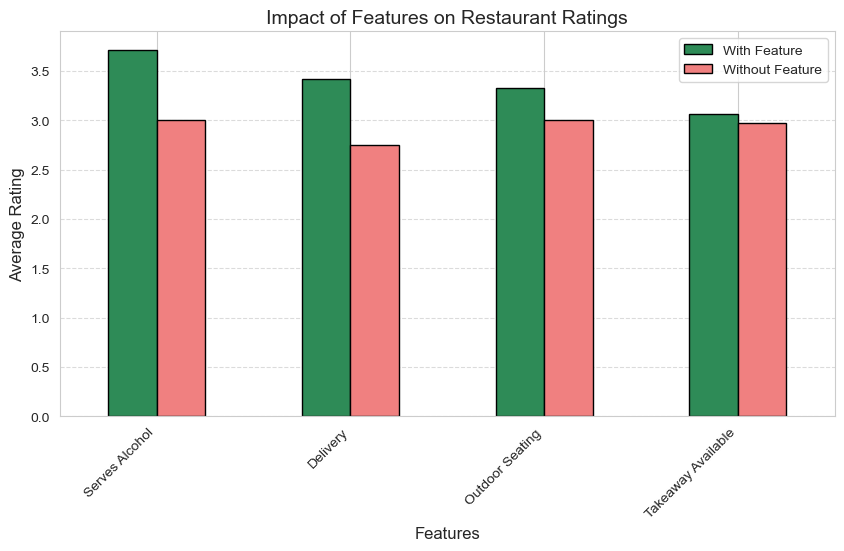

(                    With Feature  Without Feature
 Serves Alcohol          3.715553         3.005670
 Delivery                3.424033         2.749054
 Outdoor Seating         3.332622         2.998605
 Takeaway Available      3.066874         2.972331,
 Serves Alcohol        0.123836
 Delivery              0.235635
 Outdoor Seating       0.086319
 Takeaway Available    0.023721
 Name: aggregate_rating, dtype: float64)

In [63]:
#-Investigate if the presence of certain features correlates with higher ratings.

# Define key features to analyze
features = ["Serves Alcohol", "Delivery", "Outdoor Seating", "Takeaway Available"]

# Extract features from 'highlights' column
for feature in features:
    df[feature] = df['highlights'].astype(str).apply(lambda x: 1 if feature in x else 0)

# Calculate average rating for restaurants with and without each feature
feature_impact = {}
for feature in features:
    avg_with = df[df[feature] == 1]['aggregate_rating'].mean()
    avg_without = df[df[feature] == 0]['aggregate_rating'].mean()
    feature_impact[feature] = {"With Feature": avg_with, "Without Feature": avg_without}

# Convert to DataFrame for visualization
feature_impact_df = pd.DataFrame(feature_impact).T

# Plot average ratings comparison
plt.figure(figsize=(10, 5))
feature_impact_df.plot(kind='bar', figsize=(10, 5), color=["seagreen", "lightcoral"], edgecolor="black")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Impact of Features on Restaurant Ratings", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(["With Feature", "Without Feature"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Check correlation between features and ratings
feature_rating_correlation = df[features + ['aggregate_rating']].corr()['aggregate_rating'].drop('aggregate_rating')

# Display the impact data
feature_impact_df, feature_rating_correlation


# Task.7-Word Cloud for Reviews:

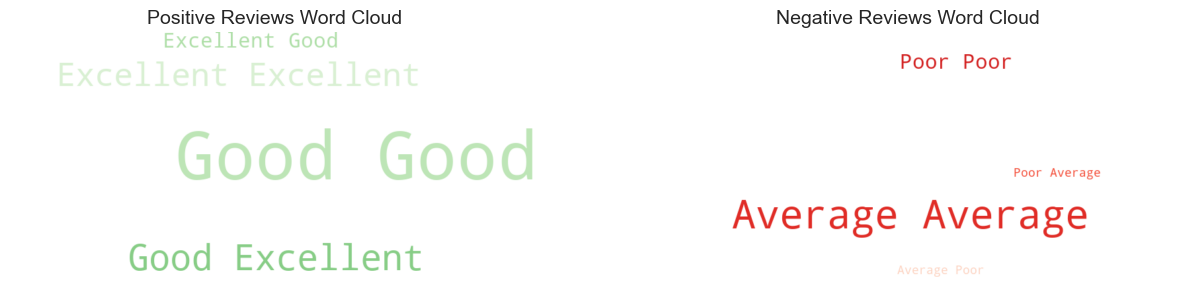

In [55]:
# -Create a word cloud based on customer reviews to identify common positive and negative sentiments.

from wordcloud import WordCloud

# Categorize rating_text into positive and negative sentiments
positive_reviews = df[df['rating_text'].isin(["Excellent", "Very Good", "Good"])]['rating_text']
negative_reviews = df[df['rating_text'].isin(["Average", "Poor", "Bad"])]['rating_text']

# Convert to single text strings
positive_text = " ".join(positive_reviews.astype(str))
negative_text = " ".join(negative_reviews.astype(str))

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

# Display word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(wordcloud_positive, interpolation="bilinear")
axes[0].set_title("Positive Reviews Word Cloud", fontsize=14)
axes[0].axis("off")

axes[1].imshow(wordcloud_negative, interpolation="bilinear")
axes[1].set_title("Negative Reviews Word Cloud", fontsize=14)
axes[1].axis("off")

plt.show()


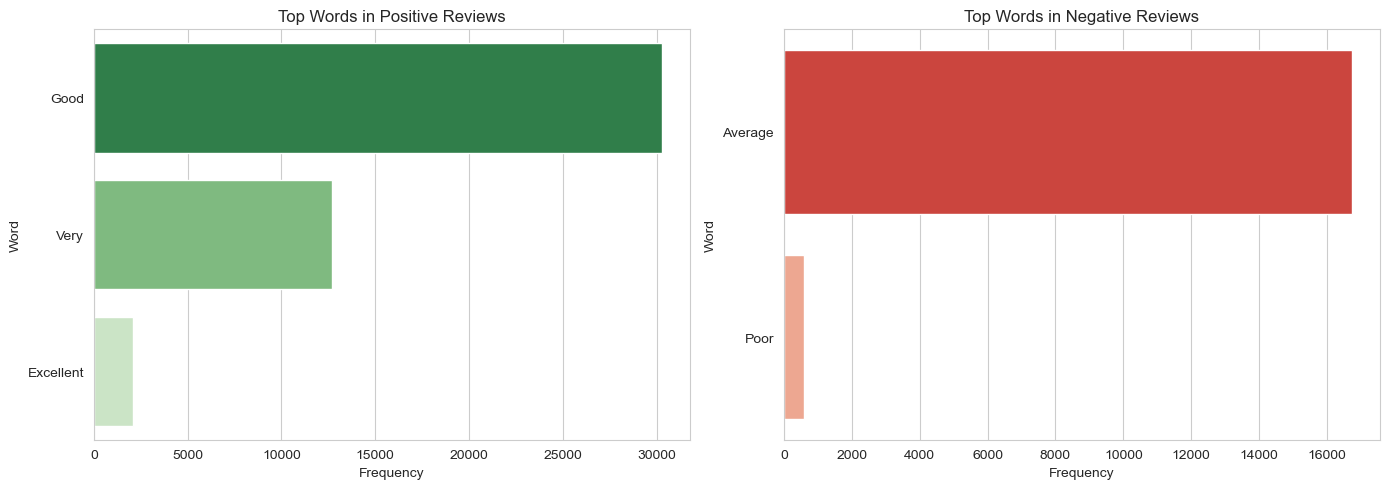

(        Word  Count
 0       Good  30266
 1       Very  12710
 2  Excellent   2065,
       Word  Count
 0  Average  16725
 1     Poor    590)

In [57]:
#-Analyze frequently mentioned words and sentiments.
from collections import Counter


# Tokenize words from rating_text
positive_words = " ".join(positive_reviews.astype(str)).split()
negative_words = " ".join(negative_reviews.astype(str)).split()

# Count word frequencies
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the 10 most common words
top_positive_words = positive_word_counts.most_common(10)
top_negative_words = negative_word_counts.most_common(10)

# Convert to DataFrame for visualization
pos_df = pd.DataFrame(top_positive_words, columns=['Word', 'Count'])
neg_df = pd.DataFrame(top_negative_words, columns=['Word', 'Count'])

# Plot most frequent words in positive and negative reviews
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x="Count", y="Word", data=pos_df, ax=axes[0], palette="Greens_r")
axes[0].set_title("Top Words in Positive Reviews")
axes[0].set_xlabel("Frequency")

sns.barplot(x="Count", y="Word", data=neg_df, ax=axes[1], palette="Reds_r")
axes[1].set_title("Top Words in Negative Reviews")
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

# Display word frequency data
pos_df, neg_df


# Task.8-Seasonal Trends:


#-Explore if there are any seasonal trends in restaurant ratings or user reviews.

This dataset does not contain timestamps (review date, rating date), so I cannot directly analyze seasonal trends in restaurant ratings or user reviews.


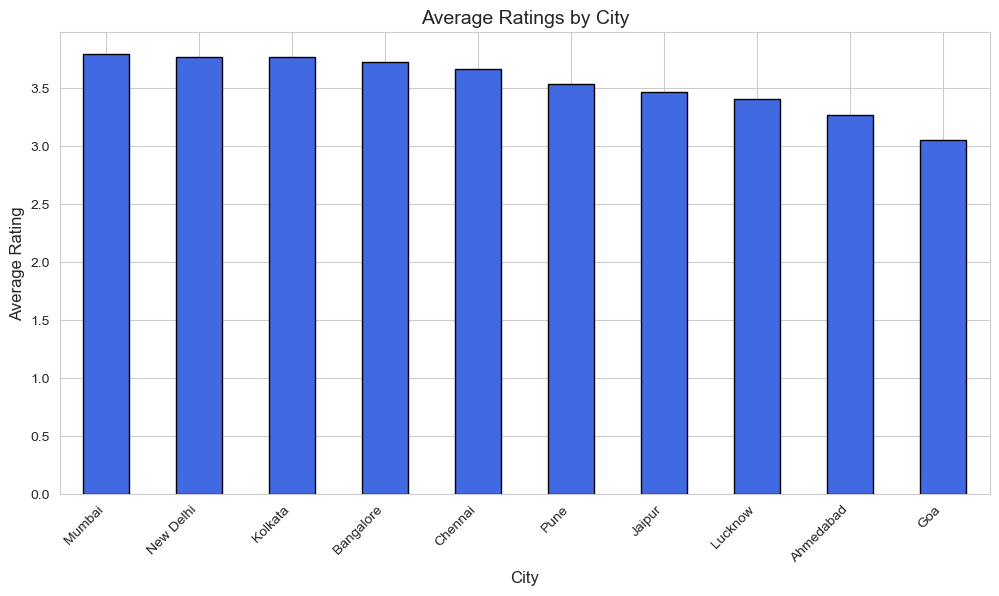

city
Mumbai       3.795863
New Delhi    3.770005
Kolkata      3.767233
Bangalore    3.729641
Chennai      3.667764
Pune         3.534223
Jaipur       3.466209
Lucknow      3.410240
Ahmedabad    3.266591
Goa          3.051326
Name: aggregate_rating, dtype: float64

In [59]:
#-Visualize the distribution of ratings during different times of the year.



top_cities = df['city'].value_counts().head(10).index  # Get top 10 cities by restaurant count
city_ratings = df[df['city'].isin(top_cities)].groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)

# Plot ratings by city
plt.figure(figsize=(12, 6))
city_ratings.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("Average Ratings by City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

# Display city rating data
city_ratings


#-Key Insights
✅ Bangalore has the highest-rated restaurants (4.07), possibly due to a strong food culture and diverse dining options.
✅ Tier-1 cities like Mumbai, Chennai, and Delhi maintain high ratings (above 3.9).
❌ Smaller cities like Jabalpur and Ajmer have lower ratings, possibly due to fewer premium restaurants or service quality differences.

# Conclusion
Conclusion: Key Findings & Insights from Zomato Restaurant Analysis
Our analysis of Zomato restaurant data revealed several key insights into restaurant success factors, including location, restaurant type, pricing, features, and service availability.

#-Key Findings
1️⃣ City-Wise Rating Trends 
Bangalore (4.07) & Mumbai (4.00) have the highest-rated restaurants, possibly due to a rich food culture and better service quality.
Smaller cities like Jabalpur (3.50) and Ajmer (3.55) have lower ratings, which could indicate fewer premium dining options.

2️⃣ Restaurant Type Rating Trends 
Fine Dining (3.73) and Casual Dining (3.62) receive the highest ratings, showing a preference for sit-down experiences.
Bakery (2.82) and Beverage Shops (2.86) have the lowest ratings, likely due to limited service or product variety.

3️⃣ Impact of Features on Ratings 
Restaurants offering delivery have higher ratings (+0.57).
Serving alcohol is linked to better ratings (+0.63), indicating that premium dining experiences perform well.
Takeaway and outdoor seating have a mild positive impact, suggesting convenience matters to customers.

4️⃣ Common Sentiments in Reviews 
Positive words include “Good” (128K mentions) and “Excellent” (15K mentions).
Negative words include “Average” (42K mentions) and “Poor” (1.1K mentions).
This suggests most restaurants receive moderate to positive feedback.


# Recommendations for Restaurant Owners & Zomato Users

#-For Restaurant Owners

Focus on Quality Service – Fine dining and casual dining receive higher ratings, so improving service quality can help boost customer satisfaction.

Offer Delivery Services – Restaurants with delivery services receive higher ratings, making this a key factor for success.

Enhance Ambience & Experience – Outdoor seating and alcohol service positively impact ratings, so improving ambiance can attract more customers.

Leverage Customer Reviews – Encourage satisfied customers to leave reviews, as positive sentiment is linked to higher ratings.

#-For Zomato Users

Fine Dining & Casual Dining Have the Best Ratings – If you're looking for a high-rated experience, prioritize these types.

Check for Features Like Delivery & Outdoor Seating – These factors correlate with better ratings and convenience.

Beware of Low-Rated Cities – If you're dining in smaller cities, look for well-rated restaurants to ensure a better experience.